In [3]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import os
info_list = []
def print_log(idx, v_list, lambda_list, diff_list, file_path):
    info_list = [[i, v_list[i], lambda_list[i], diff_list[i]] for i in range(idx)]
    print(info_list)

# Power Iteration Method

Power Iteration is utilizing the convergence of the sequence
##### $$ \frac{x}{||x||}, \frac{Ax}{||Ax||}, \frac{A^2x}{||A^2x|}, \frac{A^3x}{||A^3x||}, \cdots$$
For any matrix $$A$$ with a unique dominant eigenvalue, the sequence would converge to $$A$$'s eigenvector corresponding to its dominant eigenvalue.

To calculate an estimated natural eigenvalue for a give vector, we use Rayleigh Quotient to measure the value making this vector like an eigenvector the most.

$$ r(x) = \frac{x^T A x}{x^T x} $$

[[0, array([0., 1.]), 1.5, inf], [1, array([0.31622777, 0.9486833 ]), 1.7999999999999998, 0.2999999999999998], [2, array([0.51449576, 0.85749293]), 1.9411764705882355, 0.14117647058823568], [3, array([0.61394061, 0.78935222]), 1.9846153846153847, 0.04343891402714917], [4, array([0.66162164, 0.74983786]), 1.9961089494163422, 0.011493564800957534], [5, array([0.68467546, 0.72884807]), 1.9990243902439024, 0.002915440827560234], [6, array([0.69597329, 0.71806768]), 1.9997559189650964, 0.0007315287211939747], [7, array([0.7015611 , 0.71260931]), 1.999938968568813, 0.0001830496037165119]]


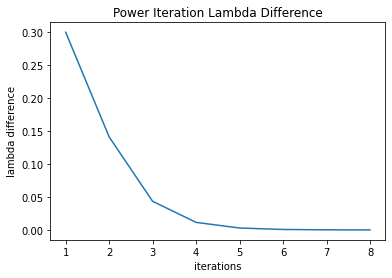

In [4]:
def PowerMethod(A,norm_indicator=True, converge_range=0.0001, file_path=""):

    r, c = A.shape

    if r != c:
        raise Exception("not a square matrix")

    #initialize eigenvectors
    v_list = []
    lambda_list = []
    diff_list = []

    idx = 0
    v_init = np.zeros(r)
    v_init[-1] = 1
    v_list.append(v_init)

    #initialize eigenvalues
    lambda_init = v_init.dot(A.dot(v_init))
    lambda_list.append(lambda_init)

    diff_init = float("inf")
    diff_list.append(diff_init)

    while diff_list[idx] > converge_range:
        #new vector
        v_new = A.dot(v_list[idx])

        if norm_indicator:
            v_new = v_new / np.linalg.norm(v_new)

        v_list.append(v_new)
        lambda_new = v_new.dot(A.dot(v_new))
        lambda_list.append(lambda_new)
        diff = np.abs(lambda_new - lambda_list[idx])
        diff_list.append(diff)
        idx = idx + 1

    print_log(idx, v_list, lambda_list, diff_list, file_path)

    #plot lambda_list
    x = [i for i in range(idx+1)]
    if len(x) > 20:
        x = x[:21]
        diff_list = diff_list[:21]

    plt.plot(x, diff_list)
    plt.title("Power Iteration Lambda Difference")
    plt.xlabel('iterations')
    plt.ylabel('lambda difference')
    plt.show()
    plt.close()
    eigenvec = v_list[-1]
    eigenvec = eigenvec / np.linalg.norm(eigenvec)
    return eigenvec, lambda_list[-1]

if __name__ == '__main__':
    A = np.array([[1.5,.5],[.5,1.5]])
    PowerMethod(A)